In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import requests
import geojson
import json 

%matplotlib inline

In [2]:
with open('../data/WeGo.json') as fi:
    credentials = json.load(fi)

In [3]:
Authorization = credentials['Authorization']

In [4]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/56'

params_MaytoJune_AMPeak = {
    'direction': '1',
    'startDate': '05-25-2022',
    'endDate': '06-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'excludeDates': '05-30-2022'
}

params_geo_MaytoJune_AMPeak  = {
    'direction': '1',
    'startDate': '05-25-2022',
    'endDate' : '06-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'resolution': 'hiRes',
    'excludeDates': '05-30-2022'
}

params_MaytoJune_PMPeak = {
    'direction': '0',
    'startDate': '05-25-2022',
    'endDate': '06-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'excludeDates': '05-30-2022'
}

params_geo_MaytoJune_PMPeak  = {
    'direction': '0',
    'startDate': '05-25-2022',
    'endDate' : '06-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '2,3,4',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'resolution': 'hiRes',
    'excludeDates': '05-30-2022'
}



headers = {'Authorization': Authorization,
         'Content-Type': 'application/json'}

In [5]:
def concat_frames_columns(geo_response, response, date_range, time_range='6am-9am', days='m-f', in_or_out='inbound'):
    """This function pulls in two API requests, puts one in a geodataframe the other in a dataframe and concats desired columns"""
    geo_df = gpd.GeoDataFrame.from_features(geo_response.json()['features'])
    res_df = pd.DataFrame(response.json()['data']['segments'])
    full_df = pd.concat([geo_df, res_df[['countForSegment', 'percent20Secs']]], axis = 1)
    full_df['dates'] = date_range
    full_df['time'] = time_range
    full_df['days_of_week'] = days
    full_df['direction']= in_or_out
    full_df['max_seg_count'] = full_df['countForSegment'].max()
    full_df['proportion_of_segments'] = full_df['countForSegment']/full_df['max_seg_count']
    return full_df

In [6]:
Route56_MaytoJune_AMPeak = concat_frames_columns(requests.get(URL, params = params_geo_MaytoJune_AMPeak,
                                        headers = headers),requests.get(URL, params=params_MaytoJune_AMPeak,
                                        headers=headers),'05/25/2022-04/24/2022','06:00-09:00',
                                        'Monday - Friday','inbound')
Route56_MaytoJune_AMPeak

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,1.941990,12.068548,12.943,2.953,...,1.317,1.103,395,1.429,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.968137
1,"LINESTRING (-86.73453 36.20898, -86.73466 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.580158,14.952935,2.090,1.947,...,1.368,1.251,19,1.425,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.046569
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.175110,11.010478,10.332,3.092,...,1.549,1.300,390,1.661,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.955882
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.286272,7.530722,9.466,5.869,...,1.385,0.569,202,1.825,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.495098
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.117063,7.660416,15.129,4.690,...,1.913,1.249,394,2.150,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.965686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,"LINESTRING (-86.71743 36.25232, -86.71757 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.609,2.426786,10.140573,32.748,3.565,...,1.500,1.249,406,1.617,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.995098
747,"LINESTRING (-86.74117 36.19872, -86.74128 36.1...",GALBURSN,Gallatin Pk & Burchwood Av,GALCARSN,Gallatin Pk & Carolyn Ave Sb,23.951,1.827262,13.107589,4.350,2.179,...,1.517,1.229,389,1.588,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.953431
748,"LINESTRING (-86.72369 36.23978, -86.72373 36.2...",GALBERWF,S Gallatin Pike & Berkley Dr Sb,GXIWALTF,Walton Station Inbound,24.773,1.736893,14.262824,9.154,2.181,...,1.264,1.086,402,1.330,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.985294
749,"LINESTRING (-86.78119 36.16721, -86.78115 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,5.948278,4.014271,265.078,7.730,...,3.398,1.874,378,3.854,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.926471


In [7]:
Route56_MaytoJune_AMPeak_StopCount = Route56_MaytoJune_AMPeak['countForSegment'].max()
Route56_MaytoJune_AMPeak_Trimmed = Route56_MaytoJune_AMPeak[Route56_MaytoJune_AMPeak['countForSegment']> Route56_MaytoJune_AMPeak_StopCount/2]
Route56_MaytoJune_AMPeak_Trimmed

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,1.941990,12.068548,12.943,2.953,...,1.317,1.103,395,1.429,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.968137
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.175110,11.010478,10.332,3.092,...,1.549,1.300,390,1.661,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.955882
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.117063,7.660416,15.129,4.690,...,1.913,1.249,394,2.150,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.965686
5,"LINESTRING (-86.75448 36.17705, -86.75473 36.1...",GXIFIVEN,Five Points Station Inbound,MAIMCFWN,Main St & Mcferrin Ave Wb,24.785,2.212454,11.202493,7.284,3.147,...,1.607,1.302,392,1.711,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.960784
6,"LINESTRING (-86.71419 36.25677, -86.71426 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.895,5.639068,4.237402,43.338,10.528,...,2.078,1.334,399,2.532,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.977941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,"LINESTRING (-86.71743 36.25232, -86.71757 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.609,2.426786,10.140573,32.748,3.565,...,1.500,1.249,406,1.617,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.995098
747,"LINESTRING (-86.74117 36.19872, -86.74128 36.1...",GALBURSN,Gallatin Pk & Burchwood Av,GALCARSN,Gallatin Pk & Carolyn Ave Sb,23.951,1.827262,13.107589,4.350,2.179,...,1.517,1.229,389,1.588,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.953431
748,"LINESTRING (-86.72369 36.23978, -86.72373 36.2...",GALBERWF,S Gallatin Pike & Berkley Dr Sb,GXIWALTF,Walton Station Inbound,24.773,1.736893,14.262824,9.154,2.181,...,1.264,1.086,402,1.330,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.985294
749,"LINESTRING (-86.78119 36.16721, -86.78115 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,5.948278,4.014271,265.078,7.730,...,3.398,1.874,378,3.854,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.926471


In [8]:
Route56_MaytoJune_AMPeak_Trimmedq80 = (Route56_MaytoJune_AMPeak_Trimmed[
    Route56_MaytoJune_AMPeak_Trimmed['percent20Secs']> 
    Route56_MaytoJune_AMPeak_Trimmed['percent20Secs'].quantile(q=0.8)])
Route56_MaytoJune_AMPeak_Trimmedq80.sort_values(by='percent20Secs',ascending=False).reset_index(drop=True)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78159 36.16633, -86.78182 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,96.613377,0.247150,991.595,154.645,...,6.047,2.363,313,33.736,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.767157
1,"LINESTRING (-86.71397 36.25739, -86.71404 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.895,112.386495,0.212615,472.867,247.555,...,9.630,1.404,392,29.311,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.960784
2,"LINESTRING (-86.78135 36.16642, -86.78159 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,29.355907,0.813397,821.760,29.177,...,4.313,2.363,335,13.299,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.821078
3,"LINESTRING (-86.78111 36.16652, -86.78135 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,12.441233,1.919263,251.988,18.002,...,3.919,2.363,339,6.374,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.830882
4,"LINESTRING (-86.78091 36.16663, -86.78111 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,7.078253,3.373431,91.860,9.781,...,3.596,1.955,344,4.857,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.843137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"LINESTRING (-86.73826 36.20405, -86.73837 36.2...",GALMAYSN,Gallatin Pike & Maynor Ave Sb,GXIEHILF,East Hill Station Inbound,24.476,2.789916,8.773024,28.155,5.039,...,1.618,1.265,391,1.731,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.958333
141,"LINESTRING (-86.73250 36.21177, -86.73264 36.2...",GALGILSF,Gallatin Pike & Gilock St Sb,GXIGREEF,Greenfield Station Inbound,24.338,4.502512,5.405427,43.220,10.629,...,1.626,1.202,391,1.725,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.958333
142,"LINESTRING (-86.69895 36.29724, -86.69910 36.2...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,16.369591,1.511828,77.634,43.177,...,1.492,0.642,396,1.724,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.970588
143,"LINESTRING (-86.74392 36.19357, -86.74403 36.1...",GALCARSN,Gallatin Pk & Carolyn Ave Sb,GXIDOUGN,Douglas Station Inbound,23.971,2.668204,8.983946,33.203,4.064,...,1.573,1.290,387,1.723,05/25/2022-04/24/2022,06:00-09:00,Monday - Friday,inbound,408,0.948529


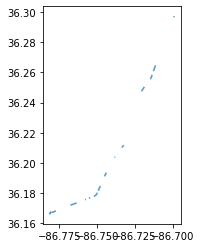

In [9]:
Route56_MaytoJune_AMPeak_Trimmedq80.plot();

In [10]:
Route56_MaytoJune_PMPeak = concat_frames_columns(requests.get(URL, params = params_geo_MaytoJune_PMPeak,
                                        headers = headers),requests.get(URL, params=params_MaytoJune_PMPeak,
                                        headers=headers),'05/25/2022-04/24/2022','14:30-18:00',
                                        'Monday - Friday','outbound')
Route56_MaytoJune_PMPeak

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70239 36.29300, -86.70226 36.2...",GALEDENN,Gallatin Pike & Edenwold Rd Nb,GALALTNF,N Gallatin Pike & Alta Loma Rd Nb,24.390,3.730377,6.538213,46.773,6.031,...,1.453,1.213,446,1.510,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.931106
1,"LINESTRING (-86.72566 36.22324, -86.72564 36.2...",GALARDNN,N Gallatin Pike & Ardee Ave Nb,GXOINGLN,Inglewood Station Outbound,24.831,2.111855,11.757910,8.157,3.041,...,1.500,1.203,446,1.553,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.931106
2,"LINESTRING (-86.68769 36.30561, -86.68790 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,2.454610,9.973478,7.884,3.928,...,1.623,1.315,446,1.800,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.931106
3,"LINESTRING (-86.72381 36.23862, -86.72376 36.2...",GXOWALTF,Walton Station Outbound,GALBERNN,S Gallatin Pike & Berkley Dr Nb,24.983,7.829496,3.190882,76.996,22.770,...,1.393,1.212,453,1.479,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.945720
4,"LINESTRING (-86.76508 36.17290, -86.76483 36.1...",JAM2AEF,James Robertson Pkwy & 2nd Ave N Eb,MAIS6SEN,Main St & S 6th St Eb,24.726,2.630834,9.398541,7.869,4.114,...,1.745,1.374,455,1.901,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.949896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.457576,10.026953,15.375,3.595,...,1.534,1.264,446,1.721,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.931106
835,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,3.186335,7.713564,27.875,5.089,...,1.842,1.490,449,2.009,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.937370
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,5.556655,4.402469,51.885,17.261,...,1.518,1.290,453,1.666,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.945720
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.940320,12.417024,3.945,2.646,...,1.472,1.254,439,1.563,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.916493


In [11]:
Route56_MaytoJune_PMPeak_StopCount = Route56_MaytoJune_PMPeak['countForSegment'].max()
Route56_MaytoJune_PMPeak_Trimmed = Route56_MaytoJune_PMPeak[Route56_MaytoJune_PMPeak['countForSegment']> Route56_MaytoJune_PMPeak_StopCount/2]
Route56_MaytoJune_PMPeak_Trimmed

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70239 36.29300, -86.70226 36.2...",GALEDENN,Gallatin Pike & Edenwold Rd Nb,GALALTNF,N Gallatin Pike & Alta Loma Rd Nb,24.390,3.730377,6.538213,46.773,6.031,...,1.453,1.213,446,1.510,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.931106
1,"LINESTRING (-86.72566 36.22324, -86.72564 36.2...",GALARDNN,N Gallatin Pike & Ardee Ave Nb,GXOINGLN,Inglewood Station Outbound,24.831,2.111855,11.757910,8.157,3.041,...,1.500,1.203,446,1.553,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.931106
2,"LINESTRING (-86.68769 36.30561, -86.68790 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,2.454610,9.973478,7.884,3.928,...,1.623,1.315,446,1.800,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.931106
3,"LINESTRING (-86.72381 36.23862, -86.72376 36.2...",GXOWALTF,Walton Station Outbound,GALBERNN,S Gallatin Pike & Berkley Dr Nb,24.983,7.829496,3.190882,76.996,22.770,...,1.393,1.212,453,1.479,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.945720
4,"LINESTRING (-86.76508 36.17290, -86.76483 36.1...",JAM2AEF,James Robertson Pkwy & 2nd Ave N Eb,MAIS6SEN,Main St & S 6th St Eb,24.726,2.630834,9.398541,7.869,4.114,...,1.745,1.374,455,1.901,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.949896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.457576,10.026953,15.375,3.595,...,1.534,1.264,446,1.721,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.931106
835,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,3.186335,7.713564,27.875,5.089,...,1.842,1.490,449,2.009,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.937370
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,5.556655,4.402469,51.885,17.261,...,1.518,1.290,453,1.666,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.945720
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.940320,12.417024,3.945,2.646,...,1.472,1.254,439,1.563,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.916493


In [12]:
Route56_MaytoJune_PMPeak_Trimmedq80 = (Route56_MaytoJune_PMPeak_Trimmed[
    Route56_MaytoJune_PMPeak_Trimmed['percent20Secs']> 
    Route56_MaytoJune_PMPeak_Trimmed['percent20Secs'].quantile(q=0.8)])
Route56_MaytoJune_PMPeak_Trimmedq80.sort_values(by='percent20Secs',ascending=False).reset_index(drop=True)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.69531 36.30058, -86.69554 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,322.089208,0.076507,1493.132,593.979,...,10.634,2.329,320,17.848,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.668058
1,"LINESTRING (-86.68593 36.30793, -86.68616 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,53.863393,0.454502,817.680,101.542,...,8.862,4.217,438,16.630,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.914405
2,"LINESTRING (-86.71419 36.25652, -86.71411 36.2...",GXOMADWG,Madison Station Outbound,GALMAPNF,Gallatin Pike & Maple St Nb,24.574,62.563262,0.392786,433.819,172.542,...,4.531,1.934,451,9.051,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.941545
3,"LINESTRING (-86.71237 36.26162, -86.71230 36.2...",GALMAPNF,Gallatin Pike & Maple St Nb,GALOLDNM,Gallatin Pike & Old Hickory Nb,24.282,22.702072,1.069594,204.517,50.109,...,6.218,1.764,440,8.388,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.918580
4,"LINESTRING (-86.71245 36.26140, -86.71237 36.2...",GXOMADWG,Madison Station Outbound,GALMAPNF,Gallatin Pike & Maple St Nb,24.574,25.332225,0.970069,210.985,52.556,...,5.036,1.630,441,8.158,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.920668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,"LINESTRING (-86.73299 36.21095, -86.73285 36.2...",GXOGREEN,Greenfield Station Outbound,GALGILNF,Gallatin Pike & Gillock St Nb,24.848,3.069583,8.094911,17.675,4.888,...,1.936,1.452,453,2.069,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.945720
164,"LINESTRING (-86.71320 36.25928, -86.71313 36.2...",GXOMADWG,Madison Station Outbound,GALMAPNF,Gallatin Pike & Maple St Nb,24.574,4.165519,5.899385,47.214,8.424,...,1.832,1.407,448,2.063,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.935282
165,"LINESTRING (-86.71178 36.26330, -86.71171 36.2...",GALMAPNF,Gallatin Pike & Maple St Nb,GALOLDNM,Gallatin Pike & Old Hickory Nb,24.282,2.661680,9.122810,11.038,3.532,...,1.902,1.586,440,2.060,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.918580
166,"LINESTRING (-86.74939 36.18124, -86.74930 36.1...",GXOFIVEF,Five Points Station Outbound,GXOEASTF,Eastland Station Outbound,24.936,4.553514,5.476210,67.487,7.759,...,1.918,1.470,457,2.058,05/25/2022-04/24/2022,14:30-18:00,Monday - Friday,outbound,479,0.954071


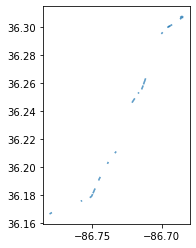

In [13]:
Route56_MaytoJune_PMPeak_Trimmedq80.plot();

In [14]:
params_MaytoJune_OffPeak_Inbound = {
    'direction': '1',
    'startDate': '05-25-2022',
    'endDate': '06-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'excludeDates': '05-30-2022'
}

params_geo_MaytoJune_OffPeak_Inbound  = {
    'direction': '1',
    'startDate': '05-25-2022',
    'endDate' : '06-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'resolution': 'hiRes',
    'excludeDates': '05-30-2022'
}

params_MaytoJune_OffPeak_Outbound = {
    'direction': '0',
    'startDate': '05-25-2022',
    'endDate': '06-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'excludeDates': '05-30-2022'
}

params_geo_MaytoJune_OffPeak_Outbound  = {
    'direction': '0',
    'startDate': '05-25-2022',
    'endDate' : '06-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '2,3,4',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'resolution': 'hiRes',
    'excludeDates': '05-30-2022'
}



In [15]:
Route56_MaytoJune_OffPeak_In = concat_frames_columns(requests.get(URL, params = params_geo_MaytoJune_OffPeak_Inbound,
                                        headers = headers),requests.get(URL, params=params_MaytoJune_OffPeak_Inbound,
                                        headers=headers),'05/25/2022-06/24/2022','09:00-14:30',
                                        'Monday - Friday','inbound')
Route56_MaytoJune_OffPeak_In

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.76563 36.17277, -86.76589 36.1...",MEIGS,Meigs Magnet School,MCC4_20,Central 4th Ave - Bay 20,24.809,4.115000,6.028919,4.115,4.115,...,4.115,4.115,1,4.115,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.001364
1,"LINESTRING (-86.73453 36.20898, -86.73466 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.762152,13.408605,2.942,2.259,...,1.382,1.257,33,1.567,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.045020
2,"LINESTRING (-86.78095 36.16659, -86.78120 36.1...",MEIGS,Meigs Magnet School,MCC4_20,Central 4th Ave - Bay 20,24.809,10.049000,2.468803,10.049,10.049,...,10.049,10.049,1,10.049,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.001364
3,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.367777,10.114550,125.141,3.129,...,1.620,1.275,707,1.733,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.964529
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,2.942885,8.113807,16.342,4.250,...,1.831,1.210,706,2.028,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.963165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,"LINESTRING (-86.76314 36.17371, -86.76339 36.1...",MEIGS,Meigs Magnet School,MCC4_21,Central 4th Ave - Bay 21,24.879,4.346000,5.724574,4.346,4.346,...,4.346,4.346,1,4.346,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.001364
936,"LINESTRING (-86.76493 36.17303, -86.76518 36.1...",MAI5STWN,Main St & 5th St Wb,JAMGAYWF,James Robertson Pkwy & Gay St Wb,24.856,24.635142,1.008965,144.213,54.378,...,2.230,1.519,718,3.216,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.979536
937,"LINESTRING (-86.77779 36.16802, -86.77783 36.1...",MEIGS,Meigs Magnet School,MCC4_20,Central 4th Ave - Bay 20,24.809,1.902000,13.043638,1.902,1.902,...,1.902,1.902,1,1.902,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.001364
938,"LINESTRING (-86.76139 36.17439, -86.76164 36.1...",MEIGS,Meigs Magnet School,MCC4_20,Central 4th Ave - Bay 20,24.809,4.845000,5.120537,4.845,4.845,...,4.845,4.845,1,4.845,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.001364


In [16]:
Route56_MaytoJune_OffPeak_Out = concat_frames_columns(requests.get(URL, params = params_geo_MaytoJune_OffPeak_Outbound,
                                        headers = headers),requests.get(URL, params=params_MaytoJune_OffPeak_Outbound,
                                        headers=headers),'05/25/2022-06/24/2022','09:00-14:30',
                                        'Monday - Friday','outbound')
Route56_MaytoJune_OffPeak_Out

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70239 36.29300, -86.70226 36.2...",GALEDENN,Gallatin Pike & Edenwold Rd Nb,GALALTNF,N Gallatin Pike & Alta Loma Rd Nb,24.390,2.685495,9.082125,45.963,4.562,...,1.349,1.041,680,1.417,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.936639
1,"LINESTRING (-86.72566 36.22324, -86.72564 36.2...",GALARDNN,N Gallatin Pike & Ardee Ave Nb,GXOINGLN,Inglewood Station Outbound,24.831,1.748628,14.200276,6.211,2.037,...,1.438,1.193,704,1.501,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.969697
2,"LINESTRING (-86.68769 36.30561, -86.68790 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,2.610930,9.376352,38.281,3.757,...,1.728,1.403,717,1.815,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.987603
3,"LINESTRING (-86.72381 36.23862, -86.72376 36.2...",GXOWALTF,Walton Station Outbound,GALBERNN,S Gallatin Pike & Berkley Dr Nb,24.983,4.695191,5.320976,94.853,12.234,...,1.303,0.766,716,1.365,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.986226
4,"LINESTRING (-86.76508 36.17290, -86.76483 36.1...",JAM2AEF,James Robertson Pkwy & 2nd Ave N Eb,MAIS6SEN,Main St & S 6th St Eb,24.726,2.419020,10.221495,9.398,3.582,...,1.652,0.894,720,1.755,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.991736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.361213,10.436161,8.761,3.320,...,1.642,1.105,707,1.801,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.973829
835,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,2.858716,8.597566,15.624,4.736,...,1.756,1.449,690,1.847,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.950413
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,3.987507,6.134911,49.774,8.761,...,1.522,1.243,713,1.639,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.982094
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.917930,12.561981,7.852,2.470,...,1.432,1.229,698,1.511,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.961433


In [17]:
Route56_MaytoJune_Weekdays_OffPeak = pd.concat([Route56_MaytoJune_OffPeak_In, 
           Route56_MaytoJune_OffPeak_Out])
Route56_MaytoJune_Weekdays_OffPeak

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.76563 36.17277, -86.76589 36.1...",MEIGS,Meigs Magnet School,MCC4_20,Central 4th Ave - Bay 20,24.809,4.115000,6.028919,4.115,4.115,...,4.115,4.115,1,4.115,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.001364
1,"LINESTRING (-86.73453 36.20898, -86.73466 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.762152,13.408605,2.942,2.259,...,1.382,1.257,33,1.567,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.045020
2,"LINESTRING (-86.78095 36.16659, -86.78120 36.1...",MEIGS,Meigs Magnet School,MCC4_20,Central 4th Ave - Bay 20,24.809,10.049000,2.468803,10.049,10.049,...,10.049,10.049,1,10.049,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.001364
3,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.367777,10.114550,125.141,3.129,...,1.620,1.275,707,1.733,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.964529
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,2.942885,8.113807,16.342,4.250,...,1.831,1.210,706,2.028,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.963165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.361213,10.436161,8.761,3.320,...,1.642,1.105,707,1.801,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.973829
835,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,2.858716,8.597566,15.624,4.736,...,1.756,1.449,690,1.847,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.950413
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,3.987507,6.134911,49.774,8.761,...,1.522,1.243,713,1.639,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.982094
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.917930,12.561981,7.852,2.470,...,1.432,1.229,698,1.511,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.961433


In [18]:
Route56_MaytoJune_OffPeak_StopCount = Route56_MaytoJune_Weekdays_OffPeak['countForSegment'].max()
Route56_MaytoJune_Weekdays_OffPeak_Trimmed = Route56_MaytoJune_Weekdays_OffPeak[Route56_MaytoJune_Weekdays_OffPeak['countForSegment']> Route56_MaytoJune_OffPeak_StopCount/2]
Route56_MaytoJune_Weekdays_OffPeak_Trimmed

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
3,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.367777,10.114550,125.141,3.129,...,1.620,1.275,707,1.733,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.964529
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,2.942885,8.113807,16.342,4.250,...,1.831,1.210,706,2.028,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.963165
5,"LINESTRING (-86.70952 36.27800, -86.70960 36.2...",GXIEDGEN,Edgemeade Station Inbound,GALNESSN,N Gallatin Pike & Nesbitt Ln Sb,24.913,1.658491,15.021486,3.592,1.967,...,1.387,0.728,733,1.475,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,1.000000
6,"LINESTRING (-86.74682 36.18735, -86.74691 36.1...",GALGRESF,Gallatin Ave & Greenwood Ave Sb,GALPETSN,Gallatin Ave & Petway Ave,23.839,2.039716,11.687411,60.274,2.831,...,1.437,1.122,714,1.527,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.974079
7,"LINESTRING (-86.72486 36.23414, -86.72487 36.2...",GXIWALTF,Walton Station Inbound,GALBROSF,Gallatin Pike & Broadmoor Sb,24.524,5.664191,4.329656,57.063,13.534,...,1.420,1.173,717,1.596,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.978172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.361213,10.436161,8.761,3.320,...,1.642,1.105,707,1.801,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.973829
835,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,2.858716,8.597566,15.624,4.736,...,1.756,1.449,690,1.847,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.950413
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,3.987507,6.134911,49.774,8.761,...,1.522,1.243,713,1.639,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.982094
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.917930,12.561981,7.852,2.470,...,1.432,1.229,698,1.511,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.961433


In [19]:
Route56_MaytoJune_Weekdays_OffPeak_Trimmedq80 = (Route56_MaytoJune_Weekdays_OffPeak_Trimmed[
    Route56_MaytoJune_Weekdays_OffPeak_Trimmed['percent20Secs']> 
    Route56_MaytoJune_Weekdays_OffPeak_Trimmed['percent20Secs'].quantile(q=0.8)])
Route56_MaytoJune_Weekdays_OffPeak_Trimmedq80.sort_values(by='percent20Secs',ascending=False).reset_index(drop=True)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.69531 36.30058, -86.69554 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,429.163394,0.057419,1323.281,779.226,...,12.071,2.042,552,120.350,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.760331
1,"LINESTRING (-86.78159 36.16633, -86.78182 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,102.522727,0.232904,798.005,184.205,...,14.849,2.125,557,34.320,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.759891
2,"LINESTRING (-86.71397 36.25739, -86.71404 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.895,111.094742,0.215087,1069.677,231.643,...,7.550,1.254,721,23.305,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.983629
3,"LINESTRING (-86.68593 36.30793, -86.68616 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,91.999276,0.266100,1219.082,155.635,...,8.231,3.877,719,15.331,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.990358
4,"LINESTRING (-86.78135 36.16642, -86.78159 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,32.444043,0.735975,684.810,46.736,...,6.150,2.125,606,14.257,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.826739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,"LINESTRING (-86.74117 36.19852, -86.74106 36.1...",GALCARNF,Gallatin Pk & Carolyn Ave Nb,GALBURNN,Gallatin Pk & Burchwood Av,24.983,2.165435,11.537174,5.843,2.579,...,1.835,1.491,687,1.907,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.946281
310,"LINESTRING (-86.76394 36.17340, -86.76419 36.1...",GXI7AVEN,Main Street Station Inbound,MAI5STWN,Main St & 5th St Wb,24.565,2.631841,9.333771,17.633,3.740,...,1.752,1.380,715,1.905,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,inbound,733,0.975443
311,"LINESTRING (-86.73382 36.20980, -86.73369 36.2...",GALIVENN,Gallatin Pike & Iverson Ave Nb,GXOGREEN,Greenfield Station Outbound,23.078,4.561703,5.059076,37.456,9.197,...,1.650,1.162,697,1.904,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.960055
312,"LINESTRING (-86.69334 36.30178, -86.69355 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,3.216214,7.661804,25.140,5.431,...,1.765,1.281,703,1.904,05/25/2022-06/24/2022,09:00-14:30,Monday - Friday,outbound,726,0.968320


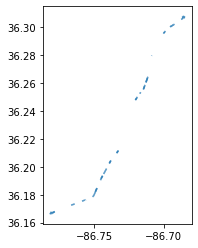

In [20]:
Route56_MaytoJune_Weekdays_OffPeak_Trimmedq80.plot();

In [21]:
params_MaytoJune_Evening_Inbound = {
    'direction': '1',
    'startDate': '05-25-2022',
    'endDate': '06-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'excludeDates': '05-30-2022'
}

params_geo_MaytoJune_Evening_Inbound  = {
    'direction': '1',
    'startDate': '05-25-2022',
    'endDate': '06-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'format' : 'geojson',
    'excludeDates': '05-30-2022'
}

params_MaytoJune_Evening_Outbound = {
    'direction': '0',
    'startDate': '05-25-2022',
    'endDate': '06-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'excludeDates': '05-30-2022'
}

params_geo_MaytoJune_Evening_Outbound  = {
    'direction': '0',
    'startDate': '05-25-2022',
    'endDate': '06-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'format' : 'geojson',
    'excludeDates': '05-30-2022'
}

In [22]:
Route56_MaytoJune_Evening_Inbound = concat_frames_columns(requests.get(URL, params = params_geo_MaytoJune_Evening_Inbound,
                                        headers = headers),requests.get(URL, params=params_MaytoJune_Evening_Inbound,
                                        headers=headers),'05/25/2022-06/24/2022','18:00-23:59',
                                        'Monday - Friday','inbound')
Route56_MaytoJune_Evening_Inbound

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,2.590294,9.048008,23.166,3.650,...,1.483,1.128,337,1.633,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.864103
1,"LINESTRING (-86.73453 36.20898, -86.73466 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.778235,13.287333,2.505,2.491,...,1.370,1.314,17,1.541,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.043590
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.108895,11.356184,4.710,3.005,...,1.572,1.335,380,1.675,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.974359
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.387631,7.305400,19.982,5.577,...,1.267,0.595,130,1.912,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.333333
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,2.877021,8.299557,12.045,4.513,...,1.628,1.133,383,1.874,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.982051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,"LINESTRING (-86.71743 36.25232, -86.71757 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.609,2.523259,9.752863,23.137,3.769,...,1.532,1.147,371,1.656,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.951282
747,"LINESTRING (-86.74117 36.19872, -86.74128 36.1...",GALBURSN,Gallatin Pk & Burchwood Av,GALCARSN,Gallatin Pk & Carolyn Ave Sb,23.951,1.869406,12.812091,5.750,2.329,...,1.457,1.282,384,1.586,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.984615
748,"LINESTRING (-86.72369 36.23978, -86.72373 36.2...",GALBERWF,S Gallatin Pike & Berkley Dr Sb,GXIWALTF,Walton Station Inbound,24.773,1.618881,15.302545,5.501,1.956,...,1.326,1.082,370,1.389,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.948718
749,"LINESTRING (-86.78119 36.16721, -86.78115 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,5.793959,4.121189,34.917,7.945,...,3.928,1.608,368,4.267,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.943590


In [23]:
Route56_MaytoJune_Evening_Outbound = concat_frames_columns(requests.get(URL, params = params_geo_MaytoJune_Evening_Outbound,
                                        headers = headers),requests.get(URL, params=params_MaytoJune_Evening_Outbound,
                                        headers=headers),'05/25/2022-06/24/2022','18:00-23:59',
                                        'Monday - Friday','outbound')
Route56_MaytoJune_Evening_Outbound

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.72566 36.22324, -86.72564 36.2...",GALARDNN,N Gallatin Pike & Ardee Ave Nb,GXOINGLN,Inglewood Station Outbound,24.831,1.742180,14.252833,4.976,2.078,...,1.398,1.106,433,1.472,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,outbound,513,0.844055
1,"LINESTRING (-86.70239 36.29300, -86.70226 36.2...",GALEDENN,Gallatin Pike & Edenwold Rd Nb,GALALTNF,N Gallatin Pike & Alta Loma Rd Nb,24.390,3.023232,8.067525,27.673,5.967,...,1.242,0.755,462,1.324,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,outbound,513,0.900585
2,"LINESTRING (-86.72381 36.23862, -86.72376 36.2...",GXOWALTF,Walton Station Outbound,GALBERNN,S Gallatin Pike & Berkley Dr Nb,24.983,6.960446,3.589281,183.107,17.424,...,1.344,1.134,444,1.424,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,outbound,513,0.865497
3,"LINESTRING (-86.68769 36.30561, -86.68790 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,2.875859,8.512587,159.065,2.909,...,1.538,0.255,512,1.702,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,outbound,513,0.998051
4,"LINESTRING (-86.76508 36.17290, -86.76483 36.1...",JAM2AEF,James Robertson Pkwy & 2nd Ave N Eb,MAIS6SEN,Main St & S 6th St Eb,24.726,2.507174,9.862100,7.640,3.810,...,1.644,1.236,430,1.787,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,outbound,513,0.838207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,3.344039,7.349795,32.139,6.541,...,1.746,1.271,434,1.901,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,outbound,513,0.846004
835,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.195803,11.222318,76.654,2.881,...,1.294,1.052,507,1.388,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,outbound,513,0.988304
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,3.949542,6.193883,35.815,11.122,...,1.376,1.000,441,1.493,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,outbound,513,0.859649
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.869699,12.886031,4.412,2.627,...,1.410,1.076,471,1.477,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,outbound,513,0.918129


In [24]:
Route56_MaytoJune_Evening = pd.concat([Route56_MaytoJune_Evening_Inbound, 
           Route56_MaytoJune_Evening_Outbound])
Route56_MaytoJune_Evening

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,2.590294,9.048008,23.166,3.650,...,1.483,1.128,337,1.633,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.864103
1,"LINESTRING (-86.73453 36.20898, -86.73466 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.778235,13.287333,2.505,2.491,...,1.370,1.314,17,1.541,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.043590
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.108895,11.356184,4.710,3.005,...,1.572,1.335,380,1.675,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.974359
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.387631,7.305400,19.982,5.577,...,1.267,0.595,130,1.912,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.333333
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,2.877021,8.299557,12.045,4.513,...,1.628,1.133,383,1.874,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.982051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,3.344039,7.349795,32.139,6.541,...,1.746,1.271,434,1.901,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,outbound,513,0.846004
835,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.195803,11.222318,76.654,2.881,...,1.294,1.052,507,1.388,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,outbound,513,0.988304
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,3.949542,6.193883,35.815,11.122,...,1.376,1.000,441,1.493,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,outbound,513,0.859649
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.869699,12.886031,4.412,2.627,...,1.410,1.076,471,1.477,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,outbound,513,0.918129


In [25]:
Route56_MaytoJune_Evening_StopCount = Route56_MaytoJune_Evening['countForSegment'].max()
Route56_MaytoJune_Evening_Trimmed = Route56_MaytoJune_Evening[Route56_MaytoJune_Evening['countForSegment']> Route56_MaytoJune_Evening_StopCount/2]
Route56_MaytoJune_Evening_Trimmed

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,2.590294,9.048008,23.166,3.650,...,1.483,1.128,337,1.633,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.864103
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.108895,11.356184,4.710,3.005,...,1.572,1.335,380,1.675,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.974359
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,2.877021,8.299557,12.045,4.513,...,1.628,1.133,383,1.874,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.982051
5,"LINESTRING (-86.75448 36.17705, -86.75473 36.1...",GXIFIVEN,Five Points Station Inbound,MAIMCFWN,Main St & Mcferrin Ave Wb,24.785,2.322921,10.669756,5.869,3.282,...,1.631,1.145,380,1.776,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.974359
6,"LINESTRING (-86.71419 36.25677, -86.71426 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.895,4.490151,5.321647,33.376,7.485,...,1.965,1.140,370,2.256,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.948718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,3.344039,7.349795,32.139,6.541,...,1.746,1.271,434,1.901,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,outbound,513,0.846004
835,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,2.195803,11.222318,76.654,2.881,...,1.294,1.052,507,1.388,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,outbound,513,0.988304
836,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,3.949542,6.193883,35.815,11.122,...,1.376,1.000,441,1.493,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,outbound,513,0.859649
837,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.869699,12.886031,4.412,2.627,...,1.410,1.076,471,1.477,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,outbound,513,0.918129


In [26]:
Route56_MaytoJune_Evening_Trimmedq80 = (Route56_MaytoJune_Evening_Trimmed[
    Route56_MaytoJune_Evening_Trimmed['percent20Secs']> 
    Route56_MaytoJune_Evening_Trimmed['percent20Secs'].quantile(q=0.8)])
Route56_MaytoJune_Evening_Trimmedq80.sort_values(by='percent20Secs',ascending=False).reset_index(drop=True)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78159 36.16633, -86.78182 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,51.966623,0.459487,627.123,73.422,...,21.008,2.221,292,28.967,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.748718
1,"LINESTRING (-86.78135 36.16642, -86.78159 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,20.509178,1.164259,577.523,23.815,...,9.996,2.221,309,13.555,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.792308
2,"LINESTRING (-86.71397 36.25739, -86.71404 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.895,74.836978,0.319294,725.807,172.887,...,2.410,1.174,368,9.188,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.943590
3,"LINESTRING (-86.68593 36.30793, -86.68616 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,47.114055,0.519611,815.309,102.493,...,5.051,0.570,509,8.090,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,outbound,513,0.992203
4,"LINESTRING (-86.78111 36.16652, -86.78135 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,12.671900,1.884327,144.305,18.032,...,5.377,2.221,310,7.272,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.794872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,"LINESTRING (-86.75473 36.17696, -86.75498 36.1...",GXIFIVEN,Five Points Station Inbound,MAIMCFWN,Main St & Mcferrin Ave Wb,24.785,2.900413,8.545335,31.622,4.901,...,1.658,1.145,378,1.804,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.969231
309,"LINESTRING (-86.69974 36.29633, -86.69990 36.2...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,2.531730,9.775134,9.838,3.628,...,1.604,1.236,341,1.804,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,inbound,390,0.874359
310,"LINESTRING (-86.71358 36.25822, -86.71351 36.2...",GXOMADWG,Madison Station Outbound,GALMAPNF,Gallatin Pike & Maple St Nb,24.574,3.367527,7.297343,32.347,5.022,...,1.662,1.222,467,1.804,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,outbound,513,0.910331
311,"LINESTRING (-86.75239 36.17778, -86.75215 36.1...",MAIMCFEN,Main St & Mcferrin Ave Eb,GXOFIVEF,Five Points Station Outbound,24.181,3.210797,7.531152,147.918,5.055,...,1.678,1.304,428,1.804,05/25/2022-06/24/2022,18:00-23:59,Monday - Friday,outbound,513,0.834308


In [27]:
params_MaytoJune_Morning_Inbound = {
    'direction': '1',
    'startDate': '05-25-2022',
    'endDate': '06-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '00:00',
    'endTime' : '06:00',
    'excludeDates': '05-30-2022'
}

params_geo_MaytoJune_Morning_Inbound  = {
    'direction': '1',
    'startDate': '05-25-2022',
    'endDate': '06-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '00:00',
    'endTime' : '06:00',
    'format' : 'geojson',
    'excludeDates': '05-30-2022'
}

params_MaytoJune_Morning_Outbound = {
    'direction': '0',
    'startDate': '05-25-2022',
    'endDate': '06-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '00:00',
    'endTime' : '06:00',
    'excludeDates': '05-30-2022'
}

params_geo_MaytoJune_Morning_Outbound  = {
    'direction': '0',
    'startDate': '05-25-2022',
    'endDate': '06-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '00:00',
    'endTime' : '06:00',
    'format' : 'geojson',
    'excludeDates': '05-30-2022'
}

In [28]:
Route56_MaytoJune_Morning_Inbound = concat_frames_columns(requests.get(URL, params = params_geo_MaytoJune_Morning_Inbound,
                                        headers = headers),requests.get(URL, params=params_MaytoJune_Morning_Inbound,
                                        headers=headers),'06/26/2022-07/26/2022','00:00-06:00',
                                        'Monday - Friday','inbound')
Route56_MaytoJune_Morning_Inbound

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,2.020367,11.600368,4.526,2.874,...,1.397,0.935,139,1.499,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.958621
1,"LINESTRING (-86.73453 36.20898, -86.73466 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.777333,13.294076,1.919,1.919,...,1.705,1.705,3,1.705,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.020690
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,1.921934,12.460886,3.937,2.314,...,1.534,1.322,106,1.610,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.731034
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.193862,7.748613,8.824,5.636,...,1.523,0.825,145,1.824,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,1.000000
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,2.599854,9.184362,34.471,3.607,...,1.472,1.120,89,1.607,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.613793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,"LINESTRING (-86.71743 36.25232, -86.71757 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.609,2.558754,9.617572,83.217,2.371,...,1.481,1.218,118,1.573,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.813793
747,"LINESTRING (-86.74117 36.19872, -86.74128 36.1...",GALBURSN,Gallatin Pk & Burchwood Av,GALCARSN,Gallatin Pk & Carolyn Ave Sb,23.951,1.758733,13.618326,2.576,2.264,...,1.441,1.014,105,1.520,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.724138
748,"LINESTRING (-86.72369 36.23978, -86.72373 36.2...",GALBERWF,S Gallatin Pike & Berkley Dr Sb,GXIWALTF,Walton Station Inbound,24.773,1.439481,17.209675,2.297,1.689,...,1.193,1.063,108,1.276,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.744828
749,"LINESTRING (-86.78119 36.16721, -86.78115 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,4.511398,5.292816,9.094,5.600,...,3.257,2.558,83,3.683,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.572414


In [29]:
Route56_MaytoJune_Morning_Outbound = concat_frames_columns(requests.get(URL, params = params_geo_MaytoJune_Morning_Outbound,
                                        headers = headers),requests.get(URL, params=params_MaytoJune_Morning_Outbound,
                                        headers=headers),'06/26/2022-07/26/2022','00:00-06:00',
                                        'Monday - Friday','outbound')
Route56_MaytoJune_Morning_Outbound

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70239 36.29300, -86.70226 36.2...",GALEDENN,Gallatin Pike & Edenwold Rd Nb,GALALTNF,N Gallatin Pike & Alta Loma Rd Nb,24.390,1.612185,15.128537,5.388,2.030,...,1.163,0.993,54,1.250,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,80,0.6750
1,"LINESTRING (-86.72566 36.22324, -86.72564 36.2...",GALARDNN,N Gallatin Pike & Ardee Ave Nb,GXOINGLN,Inglewood Station Outbound,24.831,1.584500,15.671190,2.259,1.988,...,1.327,1.188,74,1.385,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,80,0.9250
2,"LINESTRING (-86.68769 36.30561, -86.68790 36.3...",GALWMRT,Walmart Gallatin Pike,GALCONSF,Gallatin Pk & Conference Dr Sb,24.481,2.105707,11.626024,7.718,3.180,...,1.405,1.275,58,1.542,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,80,0.7250
3,"LINESTRING (-86.72381 36.23862, -86.72376 36.2...",GXOWALTF,Walton Station Outbound,GALBERNN,S Gallatin Pike & Berkley Dr Nb,24.983,1.959684,12.748484,12.275,2.497,...,1.165,1.074,79,1.259,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,80,0.9875
4,"LINESTRING (-86.76508 36.17290, -86.76483 36.1...",JAM2AEF,James Robertson Pkwy & 2nd Ave N Eb,MAIS6SEN,Main St & S 6th St Eb,24.726,2.482258,9.961092,6.245,3.624,...,1.500,1.382,62,1.665,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,80,0.7750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,1.390464,17.722142,1.968,1.642,...,1.107,0.844,56,1.247,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,80,0.7000
834,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,2.143652,11.465480,5.116,2.713,...,1.552,1.434,66,1.653,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,80,0.8250
835,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,1.638227,14.932607,2.441,1.976,...,1.301,1.085,75,1.409,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,80,0.9375
836,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.710193,14.087884,3.190,2.505,...,1.259,1.205,57,1.347,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,80,0.7125


In [30]:
Route56_MaytoJune_Morning = pd.concat([Route56_MaytoJune_Morning_Inbound, 
           Route56_MaytoJune_Morning_Outbound])
Route56_MaytoJune_Morning

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,2.020367,11.600368,4.526,2.874,...,1.397,0.935,139,1.499,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.958621
1,"LINESTRING (-86.73453 36.20898, -86.73466 36.2...",GXIGREEF,Greenfield Station Inbound,GALMAYSN,Gallatin Pike & Maynor Ave Sb,23.628,1.777333,13.294076,1.919,1.919,...,1.705,1.705,3,1.705,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.020690
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,1.921934,12.460886,3.937,2.314,...,1.534,1.322,106,1.610,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.731034
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.193862,7.748613,8.824,5.636,...,1.523,0.825,145,1.824,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,1.000000
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,2.599854,9.184362,34.471,3.607,...,1.472,1.120,89,1.607,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.613793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,"LINESTRING (-86.69228 36.30249, -86.69249 36.3...",GALCONSF,Gallatin Pk & Conference Dr Sb,GXIRIVEF,Rivergate Station,24.642,1.390464,17.722142,1.968,1.642,...,1.107,0.844,56,1.247,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,80,0.700000
834,"LINESTRING (-86.73930 36.20200, -86.73918 36.2...",GALBURNN,Gallatin Pk & Burchwood Av,GXOEHILN,East Hill Station Outbound,24.578,2.143652,11.465480,5.116,2.713,...,1.552,1.434,66,1.653,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,80,0.825000
835,"LINESTRING (-86.72493 36.23078, -86.72492 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,1.638227,14.932607,2.441,1.976,...,1.301,1.085,75,1.409,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,80,0.937500
836,"LINESTRING (-86.71113 36.26519, -86.71109 36.2...",GALOLDNM,Gallatin Pike & Old Hickory Nb,GALWILNN,Gallatin Pike & Wiley St Nb,24.093,1.710193,14.087884,3.190,2.505,...,1.259,1.205,57,1.347,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,80,0.712500


In [31]:
Route56_MaytoJune_Morning_StopCount = Route56_MaytoJune_Morning['countForSegment'].max()
Route56_MaytoJune_Morning_Trimmed = Route56_MaytoJune_Morning[Route56_MaytoJune_Morning['countForSegment']> Route56_MaytoJune_Morning_StopCount/2]
Route56_MaytoJune_Morning_Trimmed

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,2.020367,11.600368,4.526,2.874,...,1.397,0.935,139,1.499,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.958621
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,1.921934,12.460886,3.937,2.314,...,1.534,1.322,106,1.610,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.731034
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.193862,7.748613,8.824,5.636,...,1.523,0.825,145,1.824,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,1.000000
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,2.599854,9.184362,34.471,3.607,...,1.472,1.120,89,1.607,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.613793
5,"LINESTRING (-86.75448 36.17705, -86.75473 36.1...",GXIFIVEN,Five Points Station Inbound,MAIMCFWN,Main St & Mcferrin Ave Wb,24.785,2.534368,9.779558,8.272,4.096,...,1.638,1.417,87,1.851,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,"LINESTRING (-86.72480 36.23165, -86.72478 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,1.613169,15.164561,2.488,1.990,...,1.294,1.082,77,1.378,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,80,0.962500
805,"LINESTRING (-86.72496 36.23012, -86.72495 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,1.792405,13.648143,3.648,2.422,...,1.362,1.269,74,1.430,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,80,0.925000
813,"LINESTRING (-86.72495 36.23034, -86.72494 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,1.707514,14.326676,2.647,2.116,...,1.362,1.269,74,1.430,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,80,0.925000
823,"LINESTRING (-86.72494 36.23056, -86.72493 36.2...",GALBRONN,S Gallatin Pike & Broadmoor Dr Nb,GXOWALTF,Walton Station Outbound,24.463,1.675986,14.596184,2.529,2.012,...,1.330,1.269,74,1.415,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,outbound,80,0.925000


In [32]:
Route56_MaytoJune_Morning_Trimmedq80 = (Route56_MaytoJune_Morning_Trimmed[
    Route56_MaytoJune_Morning_Trimmed['percent20Secs']> 
    Route56_MaytoJune_Morning_Trimmed['percent20Secs'].quantile(q=0.8)])
Route56_MaytoJune_Morning_Trimmedq80.sort_values(by='percent20Secs',ascending=False).reset_index(drop=True)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.71397 36.25739, -86.71404 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.895,79.673951,0.299910,312.535,219.928,...,2.946,1.876,123,14.062,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.848276
1,"LINESTRING (-86.78135 36.16642, -86.78159 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,16.278187,1.466871,62.493,23.684,...,5.825,2.350,75,12.582,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.517241
2,"LINESTRING (-86.78111 36.16652, -86.78135 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,10.431065,2.289124,21.630,16.051,...,4.063,2.350,77,5.843,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.531034
3,"LINESTRING (-86.78091 36.16663, -86.78111 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,6.154731,3.879617,11.929,8.804,...,3.934,2.350,78,4.667,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.537931
4,"LINESTRING (-86.78103 36.16682, -86.78091 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,6.226372,3.834978,18.720,8.820,...,3.770,2.350,78,4.457,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.537931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,"LINESTRING (-86.74524 36.19099, -86.74533 36.1...",GXIDOUGN,Douglas Station Inbound,GALGRESF,Gallatin Ave & Greenwood Ave Sb,23.880,1.958681,12.191878,4.395,2.364,...,1.544,1.219,91,1.665,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.627586
175,"LINESTRING (-86.71676 36.25329, -86.71690 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.609,4.086178,6.022498,83.217,6.720,...,1.497,1.236,118,1.665,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.813793
176,"LINESTRING (-86.77882 36.16763, -86.77906 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,2.466600,9.680532,10.175,4.066,...,1.534,1.120,90,1.662,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.620690
177,"LINESTRING (-86.76569 36.17278, -86.76594 36.1...",MAI5STWN,Main St & 5th St Wb,JAMGAYWF,James Robertson Pkwy & Gay St Wb,24.856,2.453247,10.131878,5.967,4.099,...,1.571,1.395,85,1.661,06/26/2022-07/26/2022,00:00-06:00,Monday - Friday,inbound,145,0.586207


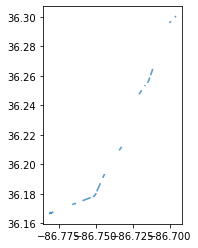

In [33]:
Route56_MaytoJune_Morning_Trimmedq80.plot();